In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

## Load Data

In [2]:
def df_dict_from_pkls():
    
    df_dict = {}
    
    for root, dirs, files in os.walk("./data/pkl", topdown=False):
        for name in files:
            file_path = os.path.join(root, name)
            df = pd.read_pickle(file_path)
            df_dict[name[:-4]] = df
    
    return df_dict

df_dict = df_dict_from_pkls()

## Feature Histograms

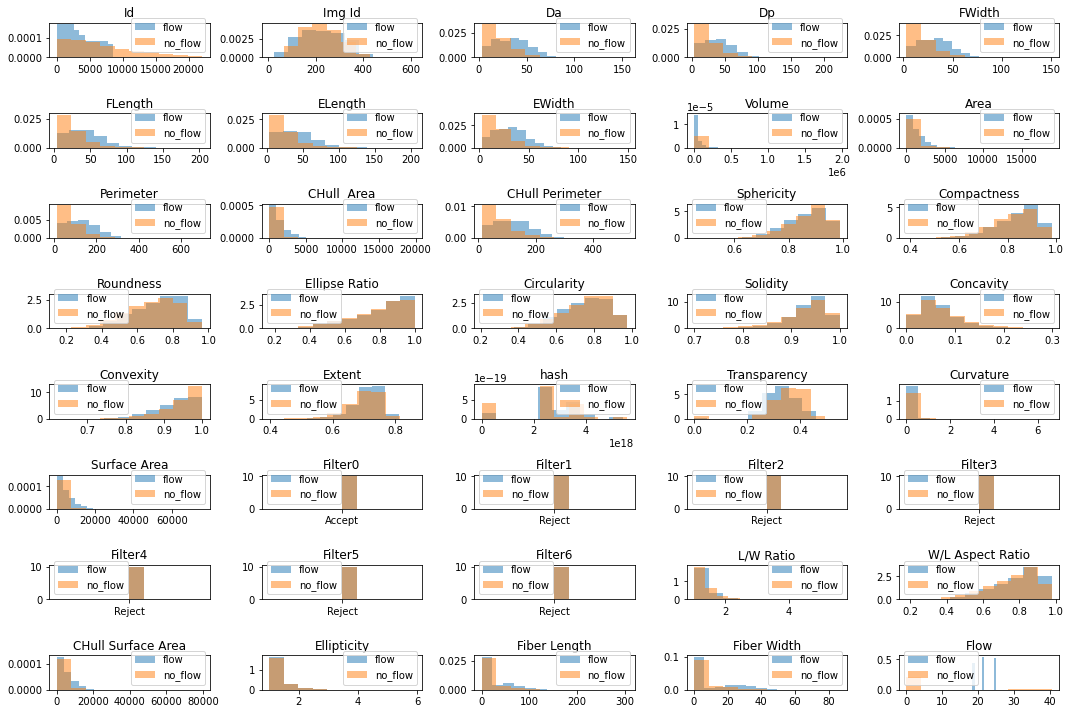

In [61]:
df_all = pd.concat(df_dict.values())

cols = df_all.columns[:-1]

figure, axis = plt.subplots(8, 5, figsize=(15, 10))

for i,col in enumerate(cols):
    ax = axis.flatten()[i]
    ax.hist(df_all[df_all['Flow Class'] == 1][col], density = True, alpha = 0.5, label = 'flow')
    ax.hist(df_all[df_all['Flow Class'] == 0][col], density = True, alpha = 0.5, label = 'no_flow')
    ax.set_title(label = col)
    ax.legend()
figure.tight_layout(pad=1)
plt.savefig("./images/flow-noflow-hist-density.png",dpi=100)
plt.show()

## Linear Discriminant Analysis

In [62]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [104]:
X = df_all[['Da','Dp']]
y = df_all['Flow Class'].values


model = LDA(n_components = 1)
X_train = model.fit_transform(X,y)

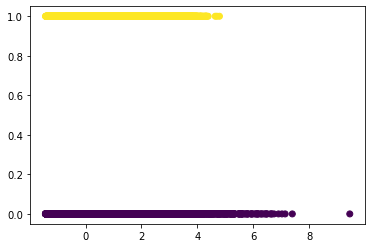

In [108]:
plt.scatter(X_train, y, c = y)

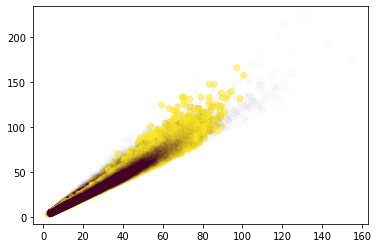

In [99]:
ax = plt.scatter(X['Da'],X['Dp'], c = y, alpha = 0.5*y+0.01)